In [123]:
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [124]:
import numpy as np

# Sample data
hours = np.array([0, 1, 1, 5, 9, 9, 10, 11, 12, 12])
gpa = np.array([0, 0, 0, 2, 3, 3, 3, 4, 4, 4])

In [125]:
# @title 1.1 Linear Regression form Scratch => Ordinary Least Squares (OLS)
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the
 target values.
        """
        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch() # Import and initialize scikit-learn class for linear regression models
lin_reg_scratch.fit(hours_reshape, gpa_reshape) # Train regression model

# Take a look at the parameters learnt
print(f"Intercept : {lin_reg_scratch.intercept_}\nCoef : {lin_reg_scratch.coef_[0][0]}")

Intercept : -0.04670487106017189
Coef : 0.335243553008596


In [126]:
# @title 1.2 - build linear model + learning update (gradient descent + learning rate) => Gradient Descent
class UpdatedLinearRegressionScratch:
    """
    Custom implementation of linear regression using gradient descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data using gradient descent.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # Initialize coefficients (slope) and intercept to zero or random small values
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        m = len(y)  # number of training examples

        for _ in range(self.n_iterations):
            # Calculate the predictions
            y_pred = self.predict(X)

            # Compute the residuals (errors)
            error = (1/m)*(y_pred - y)**2  # Note: just difference loss = the distance of prediction to ground truth, not a practical loss, like MSE, MAE

            # Calculate the gradient for intercept (slope) and coefficients (slope)
            intercept_gradient = (2/m) * np.sum(error)
            coef_gradient = (2/m) * np.dot(X.T, error)

            # Update the parameters using the gradients
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
lr = 0.01
n_iter = 10
lin_reg_updated = UpdatedLinearRegressionScratch(learning_rate=lr, n_iterations=n_iter)
lin_reg_updated.fit(hours_reshape, gpa_reshape)

print(f"Intercept : {lin_reg_updated.intercept_}\nCoef : {lin_reg_updated.coef_[0][0]}")

Intercept : -0.04782648055327146
Coef : 0.32815914438807803


In [127]:
# @title 2.1 polynomial reg from scratch (one iter update, power of 2) => Gradient Descent

# param init
a0, a1, a2 = 1, 1, 1  # assume coef at one for all
alpha = 1e-4  # learning rate
iterations = 1  # iteration of Gradient Descent
m = len(hours)

# forward
def predict(x, a0, a1, a2):
    return a2 * x**2 + a1 * x + a0

# Cost function (MSE)
def compute_cost(hours, gpa, a0, a1, a2):
    predictions = predict(hours, a0, a1, a2)
    cost = (1/(m)) * np.sum((predictions - gpa)**2)
    return cost

# Gradient Descent
for _ in range(iterations):
    predictions = predict(hours, a0, a1, a2)

    # gradient compute
    dJ_da0 = (2/m) * np.sum(predictions - gpa)
    dJ_da1 = (2/m) * np.sum((predictions - gpa) * hours)
    dJ_da2 = (2/m) * np.sum((predictions - gpa) * hours**2)

    # parameter update
    a0 -= alpha * dJ_da0
    a1 -= alpha * dJ_da1
    a2 -= alpha * dJ_da2

    # cost compute if more iteration (optional)
    if _ % 100 == 0:
        print(f"Iteration {_}, Cost: {compute_cost(hours, gpa, a0, a1, a2)}")

print(f"Optimized a0(Intercept): {a0} | a1(coef of x): {a1} | a2(coef of x^2): {a2}")

Iteration 0, Cost: 3415.607591976721
Optimized a0(Intercept): 0.9849 | a1(coef of x): 0.84188 | a2(coef of x^2): -0.7092


In [128]:
# @title 2.2 polynomial reg from scratch with np.linalg.lstsq (no update, only one iteration, power of 2)
# Define the degree of the polynomial
degree = 2

# Construct the design matrix
design_matrix = np.vander(hours, degree + 1)

# Perform polynomial regression
coefficients = np.linalg.lstsq(design_matrix, gpa, rcond=None)[0]

# Print the polynomial coefficients
print("Polynomial coefficients:")
print(coefficients)

# Define a function to evaluate the polynomial
def predict_gpa(hours):
  return np.polyval(coefficients, hours)

# Example prediction
# predicted_gpa = predict_gpa(8)
# print("Predicted GPA for 8 hours:", predicted_gpa)

Polynomial coefficients:
[-0.00412169  0.40022365 -0.21387164]


In [129]:
# @title 2.3 polynomial reg (transforming to polynomial features & linear reg) from Scikit-learn (power of 2)

# Sample data
# hours = np.array([0, 1, 1, 5, 9, 9, 10, 11, 12, 12])
# gpa = np.array([0, 0, 0, 2, 3, 3, 3, 4, 4, 4])

from sklearn.preprocessing import PolynomialFeatures
hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
hours_poly_p2 = poly_features.fit_transform(hours_reshape)

print(f"Sample at index 5 → Polynomial Features (X): {hours_poly_p2[5]} | GPA (Y): {gpa_reshape[5]}")

from sklearn.linear_model import LinearRegression
lin_reg_p2 = LinearRegression()
lin_reg_p2.fit(hours_poly_p2, gpa_reshape)
lin_reg_p2.intercept_, lin_reg_p2.coef_

print(f"Intercept : {lin_reg_p2.intercept_}\nCoef : {lin_reg_p2.coef_}")

Sample at index 5 → Polynomial Features (X): [ 9. 81.] | GPA (Y): [3]
Intercept : [-0.21387164]
Coef : [[ 0.40022365 -0.00412169]]


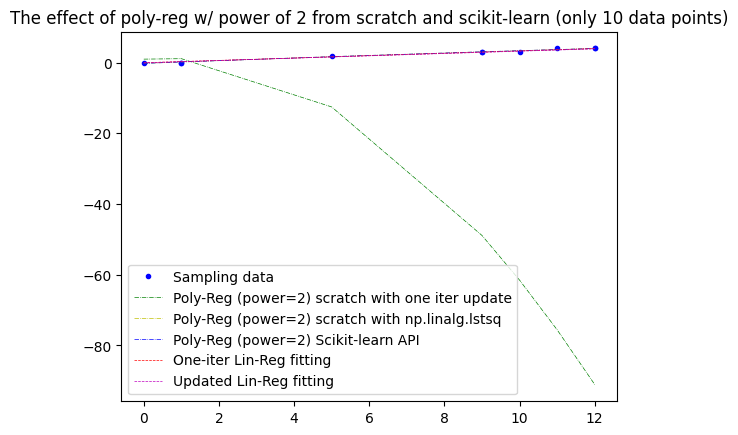

In [130]:
import matplotlib.pyplot as plt

## liner regression : y = mx + b
# Linear regression
y_linear = lin_reg_scratch.coef_[0]*hours + lin_reg_scratch.intercept_
# Updated Linear regression
y_lin_updated = lin_reg_updated.coef_[0]*hours + lin_reg_updated.intercept_

## polynomial regression : y = a2*x^2 + a1*x + a0
# Polynomial regression with power of 2 (Scratch with one iter update): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.9849 + 0.84188.x^1 + -0.7092x^2
y_p2 = a2*(hours**2) + a1*(hours) + a0
# Polynomial regression with power of 2 (Scratch with np.linalg.lstsq): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.21387164 + -0.00412169.x^1 + 0.40022365.x^2
y_p2_np = coefficients[1]*hours + coefficients[0]*(hours**2) + coefficients[2]
# Polynomial regression with power of 2 (Scikit-learn API): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.21387164 + -0.00412169.x^1 + 0.40022365.x^2
y_p2_sci = lin_reg_p2.coef_[0][0]*hours + lin_reg_p2.coef_[0][1]*(hours**2) + lin_reg_p2.intercept_[0]

plt.plot(hours, gpa, "b.", label='Sampling data')
plt.plot(hours, y_p2, "g-.", label='Poly-Reg (power=2) scratch with one iter update', linewidth=0.5)
plt.plot(hours, y_p2_np, "y-.", label='Poly-Reg (power=2) scratch with np.linalg.lstsq', linewidth=0.5)
plt.plot(hours, y_p2_sci, "b-.", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.5)
plt.plot(hours, y_linear, "r--", label='One-iter Lin-Reg fitting', linewidth=0.5)
plt.plot(hours, y_lin_updated, "m--", label='Updated Lin-Reg fitting', linewidth=0.5)

plt.title('The effect of poly-reg w/ power of 2 from scratch and scikit-learn (only 10 data points)')
plt.legend()

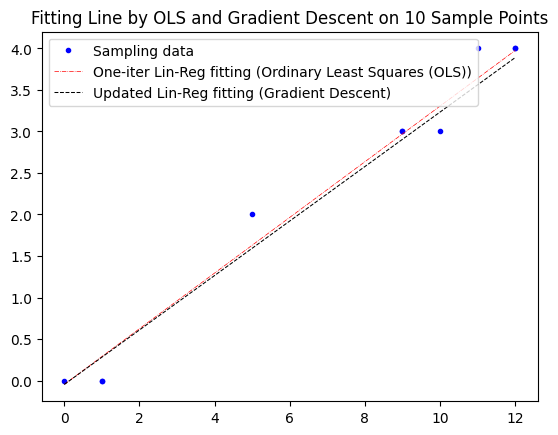

In [131]:
# @title Linear plot

plt.plot(hours, gpa, "b.", label='Sampling data')
plt.plot(hours, y_linear, "r-.", label='One-iter Lin-Reg fitting (Ordinary Least Squares (OLS))', linewidth=0.5)
plt.plot(hours, y_lin_updated, "k--", label='Updated Lin-Reg fitting (Gradient Descent)', linewidth=0.75)
plt.title('Fitting Line by OLS and Gradient Descent on 10 Sample Points')
plt.legend()

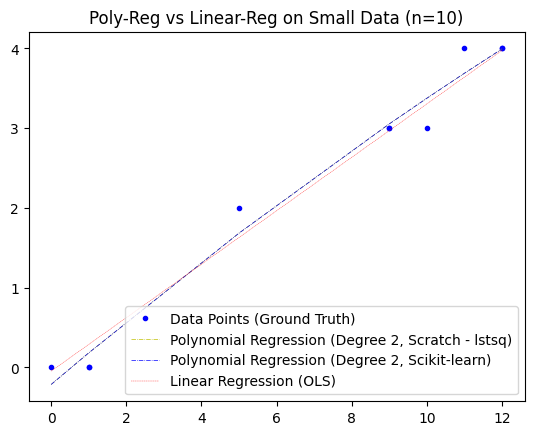

In [132]:
# @title Compare Polynomial (Deg 2) Scratch vs Sklearn vs Linear Fit

plt.plot(hours, gpa, "b.", label='Data Points (Ground Truth)')
plt.plot(hours, y_p2_np, "y-.", label='Polynomial Regression (Degree 2, Scratch - lstsq)', linewidth=0.5)
plt.plot(hours, y_p2_sci, "b-.", label='Polynomial Regression (Degree 2, Scikit-learn)', linewidth=0.5)
plt.plot(hours, y_linear, "r--", label='Linear Regression (OLS)', linewidth=0.25)
# plt.plot(hours, y_lin_updated, "m--", label='Updated Lin-Reg fitting', linewidth=0.5)
plt.title('Poly-Reg vs Linear-Reg on Small Data (n=10)')
plt.legend()

In [133]:
# @title R-Squared (R^2) metrics for all regression line plot
import sklearn.metrics as metrics
# linear
r2_lin = metrics.r2_score(gpa, y_linear)
r2_lin_up = metrics.r2_score(gpa, y_lin_updated)
# non-linear
r2_scratch = metrics.r2_score(gpa, y_p2)
r2_np = metrics.r2_score(gpa, y_p2_np)
r2_sci = metrics.r2_score(gpa, y_p2_sci)

print(f"Linearly \n\
      R^2 for linear-reg (scratch; one-iter): {r2_lin}\n\
      R^2 for linear-reg (scratch; updated): {r2_lin_up}\n\n\
Non-Linearly \n\
      R^2 for poly-reg; p=2 (scratch; one-iter): {r2_scratch}\n\
      R^2 for poly-reg; p=2 (np.linalg.lstsq): {r2_np}\n\
      R^2 for poly-reg; p=2 (scikit-learn): {r2_sci}")

Linearly 
      R^2 for linear-reg (scratch; one-iter): 0.9796476955486182
      R^2 for linear-reg (scratch; updated): 0.9764875606598763

Non-Linearly 
      R^2 for poly-reg; p=2 (scratch; one-iter): -1307.661912634759
      R^2 for poly-reg; p=2 (np.linalg.lstsq): 0.9825467677980017
      R^2 for poly-reg; p=2 (scikit-learn): 0.9825467677980017


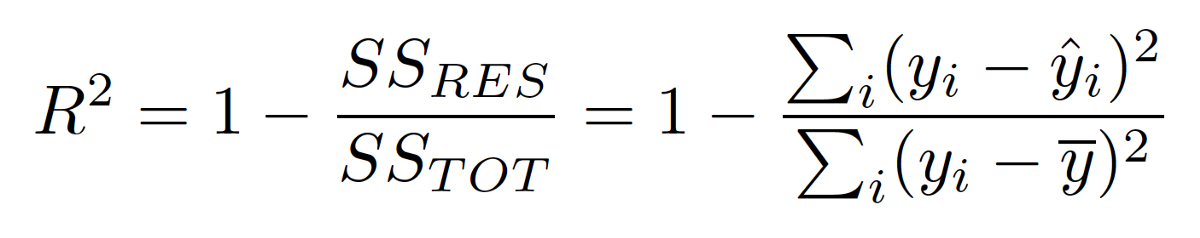

# Homework

1. จากโค้ดที่มีไว้เพื่อสร้าง data ต่อไปนี้ และแสดงผลในรูปแบบของ scatterplot
$$\textbf{y} = 3\textbf{x}^3 + 2\textbf{x}^2 + 3\textbf{x} + 4 + 2m*(rand(100,1)-1); m = noise $$
``` python
m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = (3 * X_HW**3) + (2 * X_HW**2) + (3 *X_HW) + 4 + (2*m*(np.random.rand(100, 1) - 1))
```
  1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)
  ``` python
  class LinearRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.coef_ = None
          self.intercept_ = None

      def fit(self, X, y):
          """
          Fits the linear regression model to the given data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the input data.
              y: A numpy array of shape (n_samples,) representing the
  target values.
          """
          # Calculate coefficients using the closed-form solution
          ...

      def predict(self, X):
          """
          Predicts the target values for new data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the new input data.
          Returns:
              A numpy array of shape (n_samples,) representing the predicted target values.
          """
          return np.dot(X, self.coef_) + self.intercept_
  ```
  1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ
  ``` python
  # param init
  a0, a1, a2 = ...
  alpha = ...  # learning rate
  iterations = ...  # iteration of Gradient Descent
  m = len(hours)

  # forward
    class PolyRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.a2 = 1
          self.a1 = 1
          self.a0 = 1

      def predict(x, a0, a1, a2):
          return a2 * x**2 + a1 * x + a0

      # Cost function (MSE)
      def compute_cost(self, hours, gpa):
          ...

      # Gradient Descent
      for _ in range(iterations):
          predictions = ...

          # gradient compute
          ...

          # parameter update
          ...

          # cost compute if more iteration (optional)
          if _ % 100 == 0:
              print(f"Iteration {_}, Cost: {compute_cost(self, hours, gpa)}")

      # print(f"Optimized a0: {a0}, a1: {a1}, a2: {a2}")

  ```
  1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree ด้วยตัวเอง และนำ extended dataset ไป fit กับโมเดล Linear Regression จากข้อ 1.1
  ``` python
  from sklearn.preprocessing import PolynomialFeatures
  d = ? #เเทนค่าด้วย Degree ที่ควรจะใช้จาก dataset ข้อที่ 1
  poly_features = PolynomialFeatures(degree=d, include_bias=False)
  X_poly = poly_features.fit_transform(X_HW)
  X_HW[0], X_poly[0]

  model = ? # เเทนค่าด้วย LinearRegression ที่ได้ Train ไว้จากข้อ 1.1
  ```

  1.4  เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้โดยจากกราฟจะประกอบไปด้วย
  - Linear-Reg fitting จากข้อ 1.1 (LinearRegressionScratch)
  - Poly-Reg fitting (degree=2) จากข้อ 1.2 (PolyRegressionScratch)
  - Poly-Reg (degree=n) Scikit-learn API จากข้อ 1.3

  ``` python
  # Plot the data
  plt.plot(X_HW, y_HW, "b.", label='Sampling data')
  x = np.linspace(-3, 3, 1000)

  # Plot the line
  plt.plot(X_HW, y_linear, "y-.", label='Lin-Reg fitting', linewidth=0.25)
  plt.plot(X_HW, y_p2_sc, "r--", label='Poly-Reg (degree=2) from my class function', linewidth=0.5)
  plt.plot(X_HW, y_p2_scikit, "g--", label='Poly-Reg (degree=n) Scikit-learn API', linewidth=0.75)
  plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
  plt.legend()

  ```

  1.5 วัดผลความแม่นยำของการทำนายด้วยตัวชี้วัดที่เรียกว่า R-squared (R²) หรือค่าความแปรปรวนที่อธิบายได้ของโมเดล
จากนั้นอธิบายความหมาย และเปรียบเทียบค่า R² ที่ได้จากแต่ละวิธี (จาก 3 model ข้างต้น) เพื่อวิเคราะห์ว่า วิธีไหนให้ผลการทำนายที่แม่นยำกว่ากัน และเพราะเหตุใด

# 1.1 Linear Regression from Scratch

In [ ]:
m = 1
X_HW = 2 * np.random.rand(100, 1)
X_HW = np.sort(X_HW, axis=0)
y_HW = (
    (3 * X_HW**3)
    + (2 * X_HW**2)
    + (3 * X_HW)
    + 4
    + (2 * m * (np.random.rand(100, 1) - 1))
)

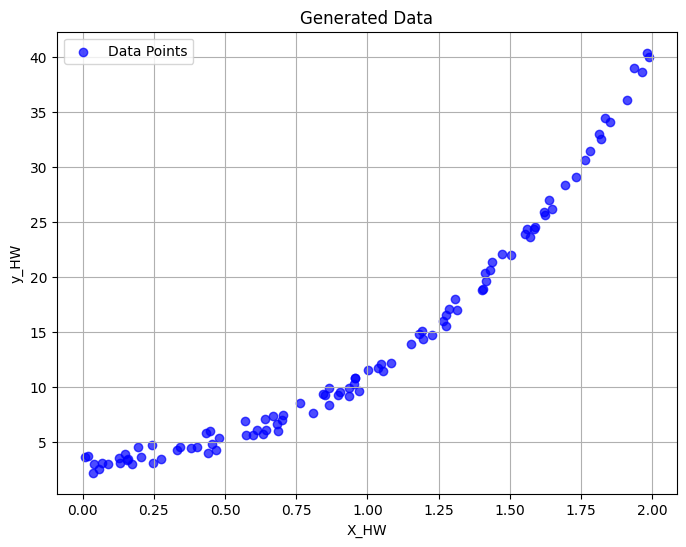

In [153]:
plt.figure(figsize=(8, 6))
plt.title('Generated Data')
plt.scatter(X_HW, y_HW, color='blue', alpha=0.7, label='Data Points')
plt.xlabel('X_HW')
plt.ylabel('y_HW')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
               Fits the linear regression model to the given data.
               Args:
                   X: A numpy array of shape (n_samples, n_features) representing the input data.
                   y: A numpy array of shape (n_samples,) representing the
        target values.
        """
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

In [155]:
X_reshape, Y_reshape = X_HW.reshape(-1, 1), y_HW.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_reshape, Y_reshape)

print(f"Intercept : {lin_reg_scratch.intercept_}\nCoef : {lin_reg_scratch.coef_[0][0]}")

Intercept : -0.6733411971264922
Coef : 15.23774536727294


# 1.2 Polynomial Regression Degree 2

In [156]:
class PolyRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """

    def __init__(self, alpha=1e-3, iterations=1000):
        self.a2 = 1
        self.a1 = 1
        self.a0 = 1
        self.alpha = alpha
        self.iterations = iterations

    def predict(self, x):
        return self.a2 * x**2 + self.a1 * x + self.a0

    # Cost function (MSE)
    def compute_cost(self, x, y):
        m = len(x)
        predictions = self.predict(x)
        cost = (1 / (m)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, x, y):
        m = len(x)

        # GD
        for i in range(self.iterations):
            predictions = self.predict(x)

            # MSE
            dJ_da0 = (2 / m) * np.sum(predictions - y)
            dJ_da1 = (2 / m) * np.sum((predictions - y) * x)
            dJ_da2 = (2 / m) * np.sum((predictions - y) * x**2)

            self.a0 -= self.alpha * dJ_da0
            self.a1 -= self.alpha * dJ_da1
            self.a2 -= self.alpha * dJ_da2

            if i % 100 == 0:
                cost = self.compute_cost(x, y)
                print(f"Iteration {i}, Cost: {cost}")

        print(f"Optimized a0 (Intercept): {self.a0}")
        print(f"Optimized a1 (coef of x): {self.a1}")
        print(f"Optimized a2 (coef of x^2): {self.a2}")

In [157]:
poly_model_scratch = PolyRegressionScratch(alpha=1e-3, iterations=1000)
poly_model_scratch.fit(
    X_HW,
    y_HW,
)

Iteration 0, Cost: 187.87152599665635
Iteration 100, Cost: 30.925253532730746
Iteration 200, Cost: 7.562322091360167
Iteration 300, Cost: 3.8998874958855065
Iteration 400, Cost: 3.16850324581026
Iteration 500, Cost: 2.895159218521949
Iteration 600, Cost: 2.7120067265595718
Iteration 700, Cost: 2.5616360466450594
Iteration 800, Cost: 2.432803804142155
Iteration 900, Cost: 2.3214632757759834
Optimized a0 (Intercept): 2.3155490961571297
Optimized a1 (coef of x): 3.828195485898444
Optimized a2 (coef of x^2): 6.610284243982184


# 1.3 Polynomial Regression Degree 3

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

d = 3 
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X_HW)

model = LinearRegression()
model.fit(X_poly, y_HW)
model.intercept_, model.coef_

(array([2.97881197]), array([[2.76518221, 2.55159897, 2.75027331]]))

# 1.4 Plotting Results

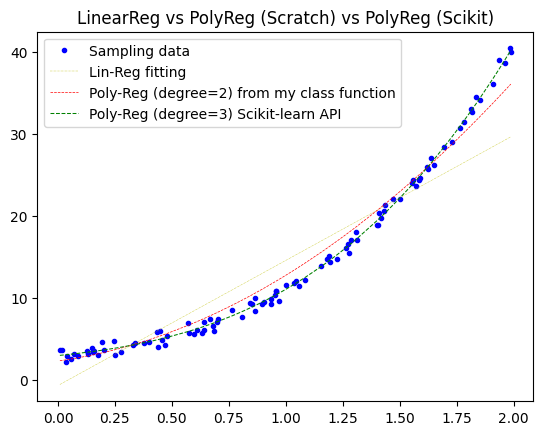

In [159]:
import matplotlib.pyplot as plt

plt.plot(X_HW, y_HW, "b.", label="Sampling data")
x = np.linspace(-3, 3, 1000)

x = X_HW

y_linear = (
    lin_reg_scratch.coef_ * x + lin_reg_scratch.intercept_
)  # Linear Regression 1.1
y_p2_sc = (
    poly_model_scratch.a2 * x**2 + poly_model_scratch.a1 * x + poly_model_scratch.a0
)  # Polynomial degree 2 (1.2)
y_p3_scikit = (
    model.coef_[0][2] * x**3
    + model.coef_[0][1] * x**2
    + model.coef_[0][0] * x
    + model.intercept_
)  # Polynomial degree 3 from 1.3

plt.plot(x, y_linear, "y-.", label="Lin-Reg fitting", linewidth=0.25)
plt.plot(
    x, y_p2_sc, "r--", label="Poly-Reg (degree=2) from my class function", linewidth=0.5
)
plt.plot(
    x, y_p3_scikit, "g--", label="Poly-Reg (degree=3) Scikit-learn API", linewidth=0.75
)

plt.title("LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)")
plt.legend()
plt.show()

# 1.5 R-squared Calculation

In [160]:
from sklearn.metrics import r2_score

# Calculate R² for all models
r2_linear = r2_score(y_HW, y_linear)
r2_poly2_scratch = r2_score(y_HW, y_p2_sc)
r2_poly3_scikit = r2_score(y_HW, y_p3_scikit)

print("=== R-squared (R²) Comparison ===")
print(f"1. Linear Regression (Scratch OLS):        R² = {r2_linear:.6f}")
print(f"2. Polynomial Regression (Degree 2, Scratch): R² = {r2_poly2_scratch:.6f}")
print(f"3. Polynomial Regression (Degree 3, Scikit): R² = {r2_poly3_scikit:.6f}")

=== R-squared (R²) Comparison ===
1. Linear Regression (Scratch OLS):        R² = 0.887481
2. Polynomial Regression (Degree 2, Scratch): R² = 0.979791
3. Polynomial Regression (Degree 3, Scikit): R² = 0.997303
